In [78]:
import datetime as dt
from collections import OrderedDict
import csv
from pathlib import Path
import scipy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [20.0, 8.0] # Default: [6.0, 4.0]

In [82]:
df = pd.read_csv('../data/csv/oving5/0141126194/Card.csv', index_col=0, parse_dates=True)

In [174]:
df

,SourceEdit1,SizeMeasure1,WarningCount1,SourceEdit2,SizeMeasure2,WarningCount2,JunitTest1,SuccessCount1,FailureCount1,ErrorCount1,...,Completion2,JunitTest3,SuccessCount3,FailureCount3,ErrorCount3,Completion3,Launch1,Relative_time,TotalSizeMeasure,TotalCompletion
2017-02-23 22:56:38,1.0,32.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,32.0,NaN
2017-02-23 22:56:38,NaN,32.0,0.0,1.0,73.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:00,105.0,NaN
2017-02-23 22:57:24,NaN,32.0,0.0,NaN,73.0,0.0,1.0,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00:46,105.0,NaN
2017-02-23 22:59:26,NaN,32.0,0.0,NaN,73.0,0.0,NaN,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:02:48,110.0,NaN
2017-02-23 22:59:29,NaN,32.0,0.0,1.0,77.0,0.0,NaN,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:02:51,114.0,NaN
2017-02-23 23:00:53,NaN,32.0,0.0,NaN,77.0,0.0,NaN,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:04:15,118.0,NaN
2017-02-23 23:02:30,NaN,32.0,0.0,NaN,77.0,0.0,NaN,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:05:52,122.0,NaN
2017-02-23 23:03:17,NaN,32.0,0.0,NaN,77.0,0.0,NaN,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:06:39,126.0,NaN
2017-02-23 23:13:12,NaN,32.0,0.0,1.0,80.0,0.0,NaN,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:16:34,129.0,NaN
2017-02-23 23:13:40,NaN,32.0,0.0,NaN,80.0,0.0,NaN,2.0,0.0,0.0,...,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,00:17:02,129.0,NaN


## Creating relative time column

In [81]:
def create_relative_time_column(df):

    df['Relative_time'] = dt.timedelta(seconds=0)  # Setting all the rows to 0, but only the first row will remain 0

    for i in range(1, len(df)):
        diff = df.index[i] - df.index[i-1]
        if diff.seconds > 600:
            diff = dt.timedelta(seconds=600)
        accumulated = df.Relative_time.iloc[i-1] + diff
        df.Relative_time.iat[i] = accumulated
    return df

In [84]:
df = create_relative_time_column(df)

In [89]:
df.filter(regex='ErrorCount')

,ErrorCount1,ErrorCount2,ErrorCount3
2017-02-23 22:56:38,NaN,NaN,NaN
2017-02-23 22:56:38,NaN,NaN,NaN
2017-02-23 22:57:24,0.0,NaN,NaN
2017-02-23 22:59:26,0.0,NaN,NaN
2017-02-23 22:59:29,0.0,NaN,NaN
2017-02-23 23:00:53,0.0,NaN,NaN
2017-02-23 23:02:30,0.0,NaN,NaN
2017-02-23 23:03:17,0.0,NaN,NaN
2017-02-23 23:13:12,0.0,NaN,NaN
2017-02-23 23:13:40,0.0,0.0,NaN


## Forward-filling and aggregating data

In [86]:
def forward_fill_columns(df):
    df.update(df.filter(regex='^SizeMeasure\d{1,}$').ffill())  # Forward-filling all columns beginning with 'SizeMeasure'
    df.update(df.filter(regex='^WarningCount\d{1,}$').ffill())  # Forward-filling all columns beginning with 'WarningCount'
    df.update(df.filter(regex='^Completion\d{1,}$').ffill())  # Forward-filling all columns beginning with 'Completion'
    df.update(df.filter(regex='^SuccessCount\d{1,}$').ffill())  # Forward-filling all columns beginning with 'SuccessCount'
    df.update(df.filter(regex='^FailureCount\d{1,}$').ffill())  # Forward-filling all columns beginning with 'FailureCount'
    df.update(df.filter(regex='^ErrorCount\d{1,}$').ffill())  # Forward-filling all columns beginning with 'ErrorCount'
    return df

In [91]:
def aggregate_columns(df):
    df['TotalSizeMeasure'] = df.filter(regex='^SizeMeasure\d{1,}$').sum(axis=1)
    # We get the total completion by averaging all the Completion columns. Not skipping NaNs so we always require all values
    df['TotalCompletion'] = df.filter(regex='^Completion\d{1,}$').mean(skipna=False, axis=1)
    return df

In [92]:
df = forward_fill_columns(df)
df = aggregate_columns(df)

## Plotting

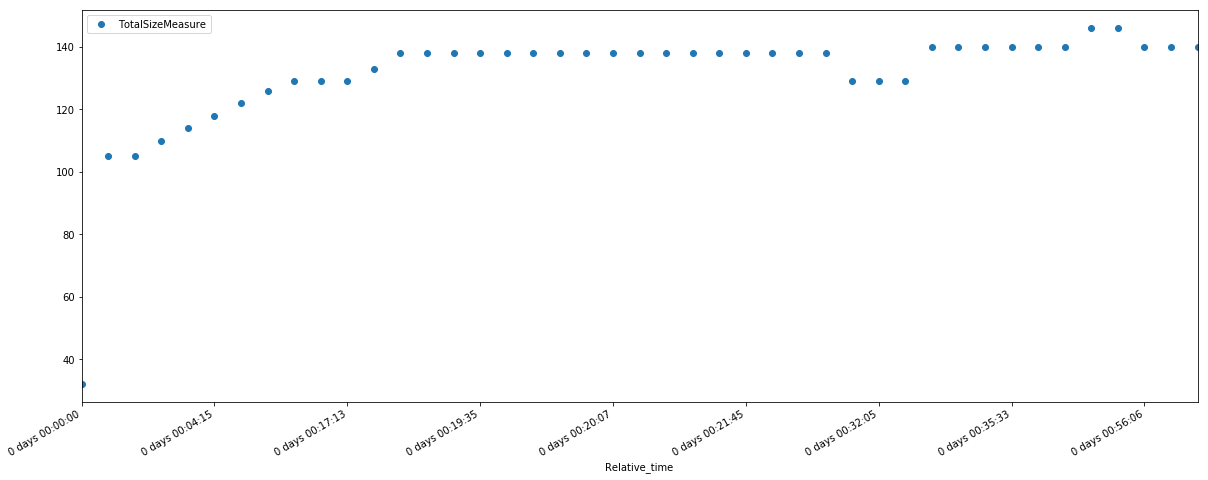

In [192]:
df.plot(x='Relative_time', y='TotalSizeMeasure', style='o')

In [187]:
scaler = MinMaxScaler().fit(df.drop('Relative_time', axis=1).fillna(0))
scaler.transform(df.drop('Relative_time', axis=1).fillna(0))

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.64035088,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.64035088,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.94736842,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.94736842,  1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.94736842,  1.        ]])

## Importing the grades into a dictionary where the keys are username hashes

In [37]:
grades = OrderedDict()
with open('../brukernummer-karakter.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile, fieldnames=['hash', 'grade'])
    for row in reader:
        grades[row['hash']] = row['grade']

In [38]:
grades

OrderedDict([('1961606504', 'D'),
             ('0003195112', 'A'),
             ('2370221083', 'A'),
             ('3417169296', 'C'),
             ('3049944332', 'F'),
             ('3169265502', 'B'),
             ('1309367009', 'A'),
             ('2900473238', 'F'),
             ('0100313338', 'F'),
             ('3528648608', 'F'),
             ('3635712884', 'F'),
             ('3172735784', 'A'),
             ('3092715252', 'C'),
             ('2885425503', 'F'),
             ('0053596332', 'A'),
             ('3401034429', 'C'),
             ('3311094284', 'B'),
             ('1395134805', 'E'),
             ('0244999521', 'C'),
             ('4025554098', 'F'),
             ('1625178573', 'F'),
             ('3447007398', 'F'),
             ('2747401993', 'A'),
             ('2877527733', 'C'),
             ('1843717383', 'F'),
             ('0109441257', 'F'),
             ('3810295105', 'C'),
             ('3565377643', 'C'),
             ('0312660958', 'C'),
             (

## Creating features from the raw data

In [145]:
def get_features(df, hash_id):
    df = create_relative_time_column(df)
    df = forward_fill_columns(df)
    df = aggregate_columns(df)
    #if 'TotalSizeMeasure' not in df.columns:
    #    return None
    f_df = pd.DataFrame(index=[hash_id])
    f_df['MaxSizeMeasure'] = df.TotalSizeMeasure.max()
    f_df['FinalSizeMeasure'] = df.TotalSizeMeasure.iloc[-1]  # Works because SizeMeasure is forward-filled!
    f_df['JunitRuns'] = df.filter(regex='^JunitTest\d{1,}$').sum().sum()
    if f_df.JunitRuns.item() == 0:
        print('{} not valid'.format(hash_id))
        return None
    #if df.Completion.last_valid_index() is None:
        #return None
    #f_df['FinalCompletion'] = df.loc[df.Completion.last_valid_index()].Completion
    f_df['SizeMeasure_div_JunitRuns'] = (f_df.FinalSizeMeasure / f_df.JunitRuns)[-1]
    f_df['SizeMeasure_times_Completion_avg'] = (df.TotalSizeMeasure * df.TotalCompletion).mean()
    f_df['MinutesSpent'] = df.Relative_time.iloc[-1].seconds / 60
    if f_df.MinutesSpent.item() < 5:
        print('Student {} spent less than 5 minutes, discarded'.format(hash_id))
        return None
    if hash_id not in grades:
        print('No grade found for {}'.format(hash_id))
        return None
    f_df['Grade'] = grades[hash_id]
    return f_df

In [95]:
features_df = get_features(df, '0141126194')

In [96]:
features_df

,MaxSizeMeasure,FinalSizeMeasure,JunitRuns,SizeMeasure_div_JunitRuns,SizeMeasure_div_Completion_avg,MinutesSpent,Grade
0141126194,146.0,140.0,21.0,6.666667,167.32197,56.683333,A


## Loading all csv files for a given part of an exercise:

In [146]:
df_partner = pd.DataFrame() 
directory_in_str = '../data/csv/oving5'
pathlist = Path(directory_in_str).glob('**/Partner.csv')
for path in pathlist:
    path = str(path)
    user_df = pd.read_csv(path, index_col=0, parse_dates=True)
    feature_df = get_features(user_df, path.split('\\')[-2])
    df_partner = df_partner.append(feature_df)

Student 0000100519 spent less than 5 minutes, discarded
Student 0095957624 spent less than 5 minutes, discarded
0255406642 not valid
Student 0381900994 spent less than 5 minutes, discarded
0460132873 not valid
Student 0911527863 spent less than 5 minutes, discarded
1064073695 not valid
1197460675 not valid
1214659802 not valid
Student 1498100588 spent less than 5 minutes, discarded
1570208485 not valid
No grade found for 1945937763
1946428102 not valid
2127261703 not valid
Student 2511031326 spent less than 5 minutes, discarded
2771668913 not valid
Student 2839268466 spent less than 5 minutes, discarded
3008884435 not valid
3030780014 not valid
3057131206 not valid
Student 3142703072 spent less than 5 minutes, discarded
Student 3250159375 spent less than 5 minutes, discarded
3255161804 not valid
3635706237 not valid
Student 3639253708 spent less than 5 minutes, discarded
No grade found for 3685854592
3884315829 not valid
4225281226 not valid


In [153]:
grade_dict = {
    'A': 5,
    'B': 4,
    'C': 3,
    'D': 2,
    'E': 1,
    'F': 0,
}

In [157]:
df_partner.Grade = df_partner.Grade.apply(lambda x: grade_dict[x])

## Training classifier

In [164]:
training_input = df_partner.iloc[:129].copy()
training_output = training_input[['Grade']].copy().squeeze()
training_input.drop(['Grade'], axis=1, inplace=True)

validation_input = df_partner.iloc[129:].copy()
validation_output = validation_input[['Grade']].copy().squeeze()
validation_input.drop(['Grade'], axis=1, inplace=True)

In [165]:
input_scaler = MinMaxScaler()
training_input_scaled = input_scaler.fit(training_input).transform(training_input)
validation_input_scaled = input_scaler.fit(validation_input).transform(validation_input)

output_scaler = MinMaxScaler()

In [170]:
classifier = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, max_depth=50, verbose=1)
classifier.fit(training_input, training_output)

      Iter       Train Loss   Remaining Time 
         1         170.5557            9.00s
         2         134.8548           10.25s
         3         109.2053           11.81s
         4          89.6114           11.84s
         5          74.1433           11.36s
         6          61.6864           11.11s
         7          51.5232           11.08s
         8          43.1572           11.05s
         9          36.2267           10.97s
        10          30.4588           10.95s
        20           5.6005            9.32s
        30           1.0530            7.99s
        40           0.2008            7.16s
        50           0.0857            6.29s
        60           0.0821            5.43s
        70           0.0810            4.82s
        80           0.0804            4.33s
        90           0.0802            3.96s
       100           0.0802            3.67s
       200           0.0802            2.24s
       300           0.0802            1.64s
       40

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=50,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=1,
              warm_start=False)

### Predicting using the classifier

In [171]:
classifier.predict(validation_input)

array([3, 0, 3, 0, 5, 3, 1, 3, 3, 0, 5, 3, 3, 3, 0, 5, 3, 0, 3, 0, 3, 1, 3,
       3, 0, 0, 3, 5, 1, 0, 3, 5, 0, 2, 1, 4, 3, 3, 3, 3, 4, 3, 3, 2, 0, 5,
       2, 0, 3, 5, 3, 3, 2, 0, 3, 3, 0, 3, 3, 0, 1, 3, 0, 2], dtype=int64)

In [163]:
validation_output

3037756263    4
3048563493    3
3057140702    3
3067298038    1
3081113763    0
3081194467    0
3092714815    4
3092731527    5
3093016476    4
3192943516    3
3211325058    3
3228780875    0
3229067429    4
3229092979    3
3243760233    0
3244600878    3
3253997202    0
3286198662    4
3302042822    0
3367344267    3
3381182863    3
3392388391    4
3392388628    4
3433302800    0
3433316438    5
3438813132    1
3442391278    0
3446899145    5
3447007363    5
3450436711    0
             ..
3523993705    0
3528631075    5
3528648608    0
3551484552    4
3560721684    2
3570047343    4
3573925417    3
3589080532    3
3589095034    2
3589101203    2
3613244908    2
3632316825    0
3634897862    3
3634898837    0
3634911862    0
3685854635    5
3715975840    5
3738689890    3
3755498028    0
3784495719    5
3806452075    1
3806970691    4
3855155298    1
3859682896    5
3869971273    1
3880613782    4
3974352416    4
3984480272    0
4018429317    3
4250493968    4
Name: Grade, Length: 64,

In [ ]:
plt.scatter(df_partner.MaxSizeMeasure, df_partner.SizeMeasure_div_JunitRuns)